In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set(
    style='ticks',
    font_scale=1.5,
)
sns.set_palette('RdYlBu', 3)

In [48]:
def fig_xlabel(fig, label, x=0.5, y=0):
    return fig.text(x, y, label, horizontalalignment='center', verticalalignment='bottom')

def fig_ylabel(fig, label, x=0, y=0.5):
    return fig.text(x, y, label, rotation='vertical', horizontalalignment='right', verticalalignment='center')

def fig_panel_labels(axes, letters='ABCDEFGHIJKLMNOP', xcoord=-0.17, ycoord=0.92, panel_label_size=plt.rcParams[ 'axes.titlesize']*1.3):
    return [
        ax.annotate(letter, (xcoord, ycoord), xycoords='axes fraction', fontsize=panel_label_size)
        for ax, letter 
        in zip(axes.flat, letters)
    ]

In [64]:
def phase_plane(x, yhigh, ylow, ax=None):
    n = len(x)
    ymin = min(ylow.min(), yhigh.min())
    ymax = max(ylow.max(), yhigh.max())
    
    if ax is None:
        fig, ax = plt.subplots()
    f1 = ax.fill_between(x, yhigh, [100]*n, alpha=0.7)
    f2 = ax.fill_between(x, ylow, yhigh)
    f3 = ax.fill_between(x, ylow, [1]*n, alpha=0.7)
    f4 = ax.plot(x, yhigh, color='k', alpha=0.5, ls='--')
    f5 = ax.plot(x, ylow, color='k', alpha=0.5, ls='--')
    ax.set(
        ylim=(ymin, ymax),
        xlim=(x.min(), x.max()),
        ylabel=''
    )
    sns.despine(top=True, bottom=True, right=True, left=True)
    return ax, (f1,f2,f3,f4,f5)

/Users/yoavram/miniconda3/envs/Milpitas/lib/python3.5/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


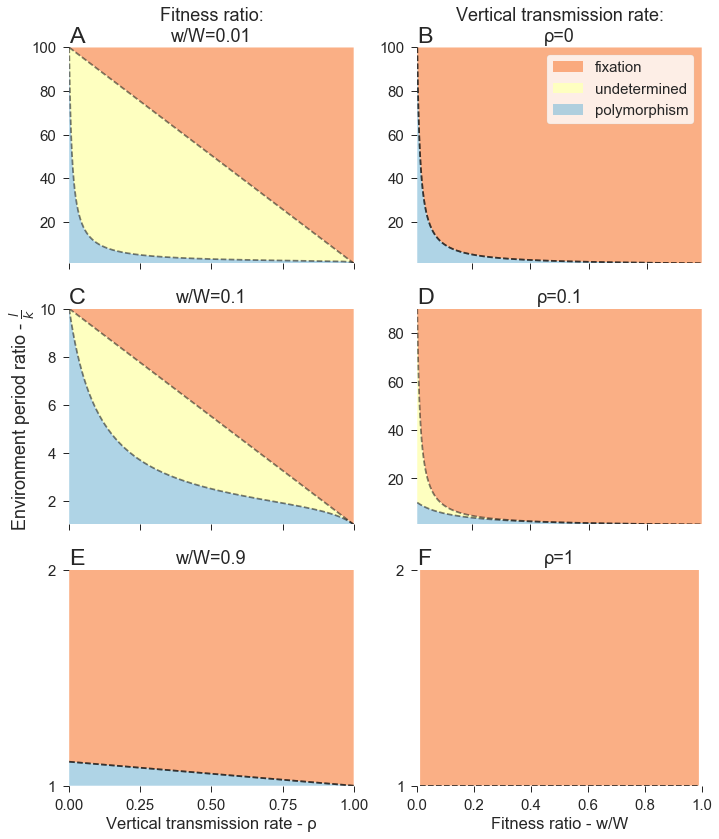

In [65]:
n = 1000
W = 1

fig, axes = plt.subplots(3, 2, squeeze=False, sharex='col', sharey=False, figsize=(10, 12))

ρ = np.linspace(0, 1, n)

w = 0.01
fix_boundry = 1 + (1-ρ) * (W-w)/w
poly_boundry = 1 + ((1-ρ) * (W-w)/w) / (1 + ρ * (1 - ρ) * (W - w)**2 / (W * w))

phase_plane(ρ, fix_boundry, poly_boundry, ax=axes[0,0])
axes[0, 0].set(
    title=('Fitness ratio:\nw/W={}'.format(w/W)),
)

w = 0.1
fix_boundry = 1 + (1-ρ) * (W-w)/w
poly_boundry = 1 + ((1-ρ) * (W-w)/w) / (1 + ρ * (1 - ρ) * (W - w)**2 / (W * w))

phase_plane(ρ, fix_boundry, poly_boundry, ax=axes[1, 0])
axes[1, 0].set(
    title=('w/W={}'.format(w/W)),
)

w = 0.9
fix_boundry = 1 + (1-ρ) * (W-w)/w
poly_boundry = 1 + ((1-ρ) * (W-w)/w) / (1 + ρ * (1 - ρ) * (W - w)**2 / (W * w))

phase_plane(ρ, fix_boundry, poly_boundry, ax=axes[2, 0])
axes[2, 0].set(
    title=('w/W={}'.format(w/W)),
    yticks=np.arange(1, fix_boundry.max()+1, 1),
    xticks=np.linspace(0, 1, 5),
    xlabel='Vertical transmission rate - ρ',
)

w = np.linspace(0.01, 0.99, n)

ρ = 0
fix_boundry = 1 + (1-ρ) * (W-w)/w
poly_boundry = 1 + ((1-ρ) * (W-w)/w) / (1 + ρ * (1 - ρ) * (W - w)**2 / (W * w))

_, f = phase_plane(w, fix_boundry, poly_boundry, ax=axes[0, 1])
axes[0, 1].set(
    title=('Vertical transmission rate:\nρ={}'.format(ρ)),
)

ρ = 0.1
fix_boundry = 1 + (1-ρ) * (W-w)/w
poly_boundry = 1 + ((1-ρ) * (W-w)/w) / (1 + ρ * (1 - ρ) * (W - w)**2 / (W * w))

phase_plane(w, fix_boundry, poly_boundry, ax=axes[1, 1])
axes[1, 1].set(
    title=('ρ={}'.format(ρ)),
)

ρ = 1
fix_boundry = 1 + (1-ρ) * (W-w)/w
poly_boundry = 1 + ((1-ρ) * (W-w)/w) / (1 + ρ * (1 - ρ) * (W - w)**2 / (W * w))

phase_plane(w, fix_boundry, poly_boundry, ax=axes[2, 1])
axes[2, 1].set(
    title=('ρ={}'.format(ρ)),
    yticks=np.arange(1, fix_boundry.max()+2, 1),
    xticks=np.linspace(0, 1, 6),
    xlabel='Fitness ratio - w/W',
)

axes[0, 1].legend(f[:3], ['fixation', 'undetermined', 'polymorphism', ], frameon=True, loc='upper right')
ylabel = fig_ylabel(fig, r'Environment period ratio - $\frac{l}{k}$', x=0.035)
fig_panel_labels(axes, xcoord=0, ycoord=1.025)
fig.tight_layout()

fig.savefig('../figures/lk_phase_plane.pdf', dpi=300, bbox_extra_artists=[ylabel], bbox_inches='tight')
fig.savefig('../figures/lk_phase_plane.png', dpi=300, bbox_extra_artists=[ylabel], bbox_inches='tight')

In [66]:
import PIL

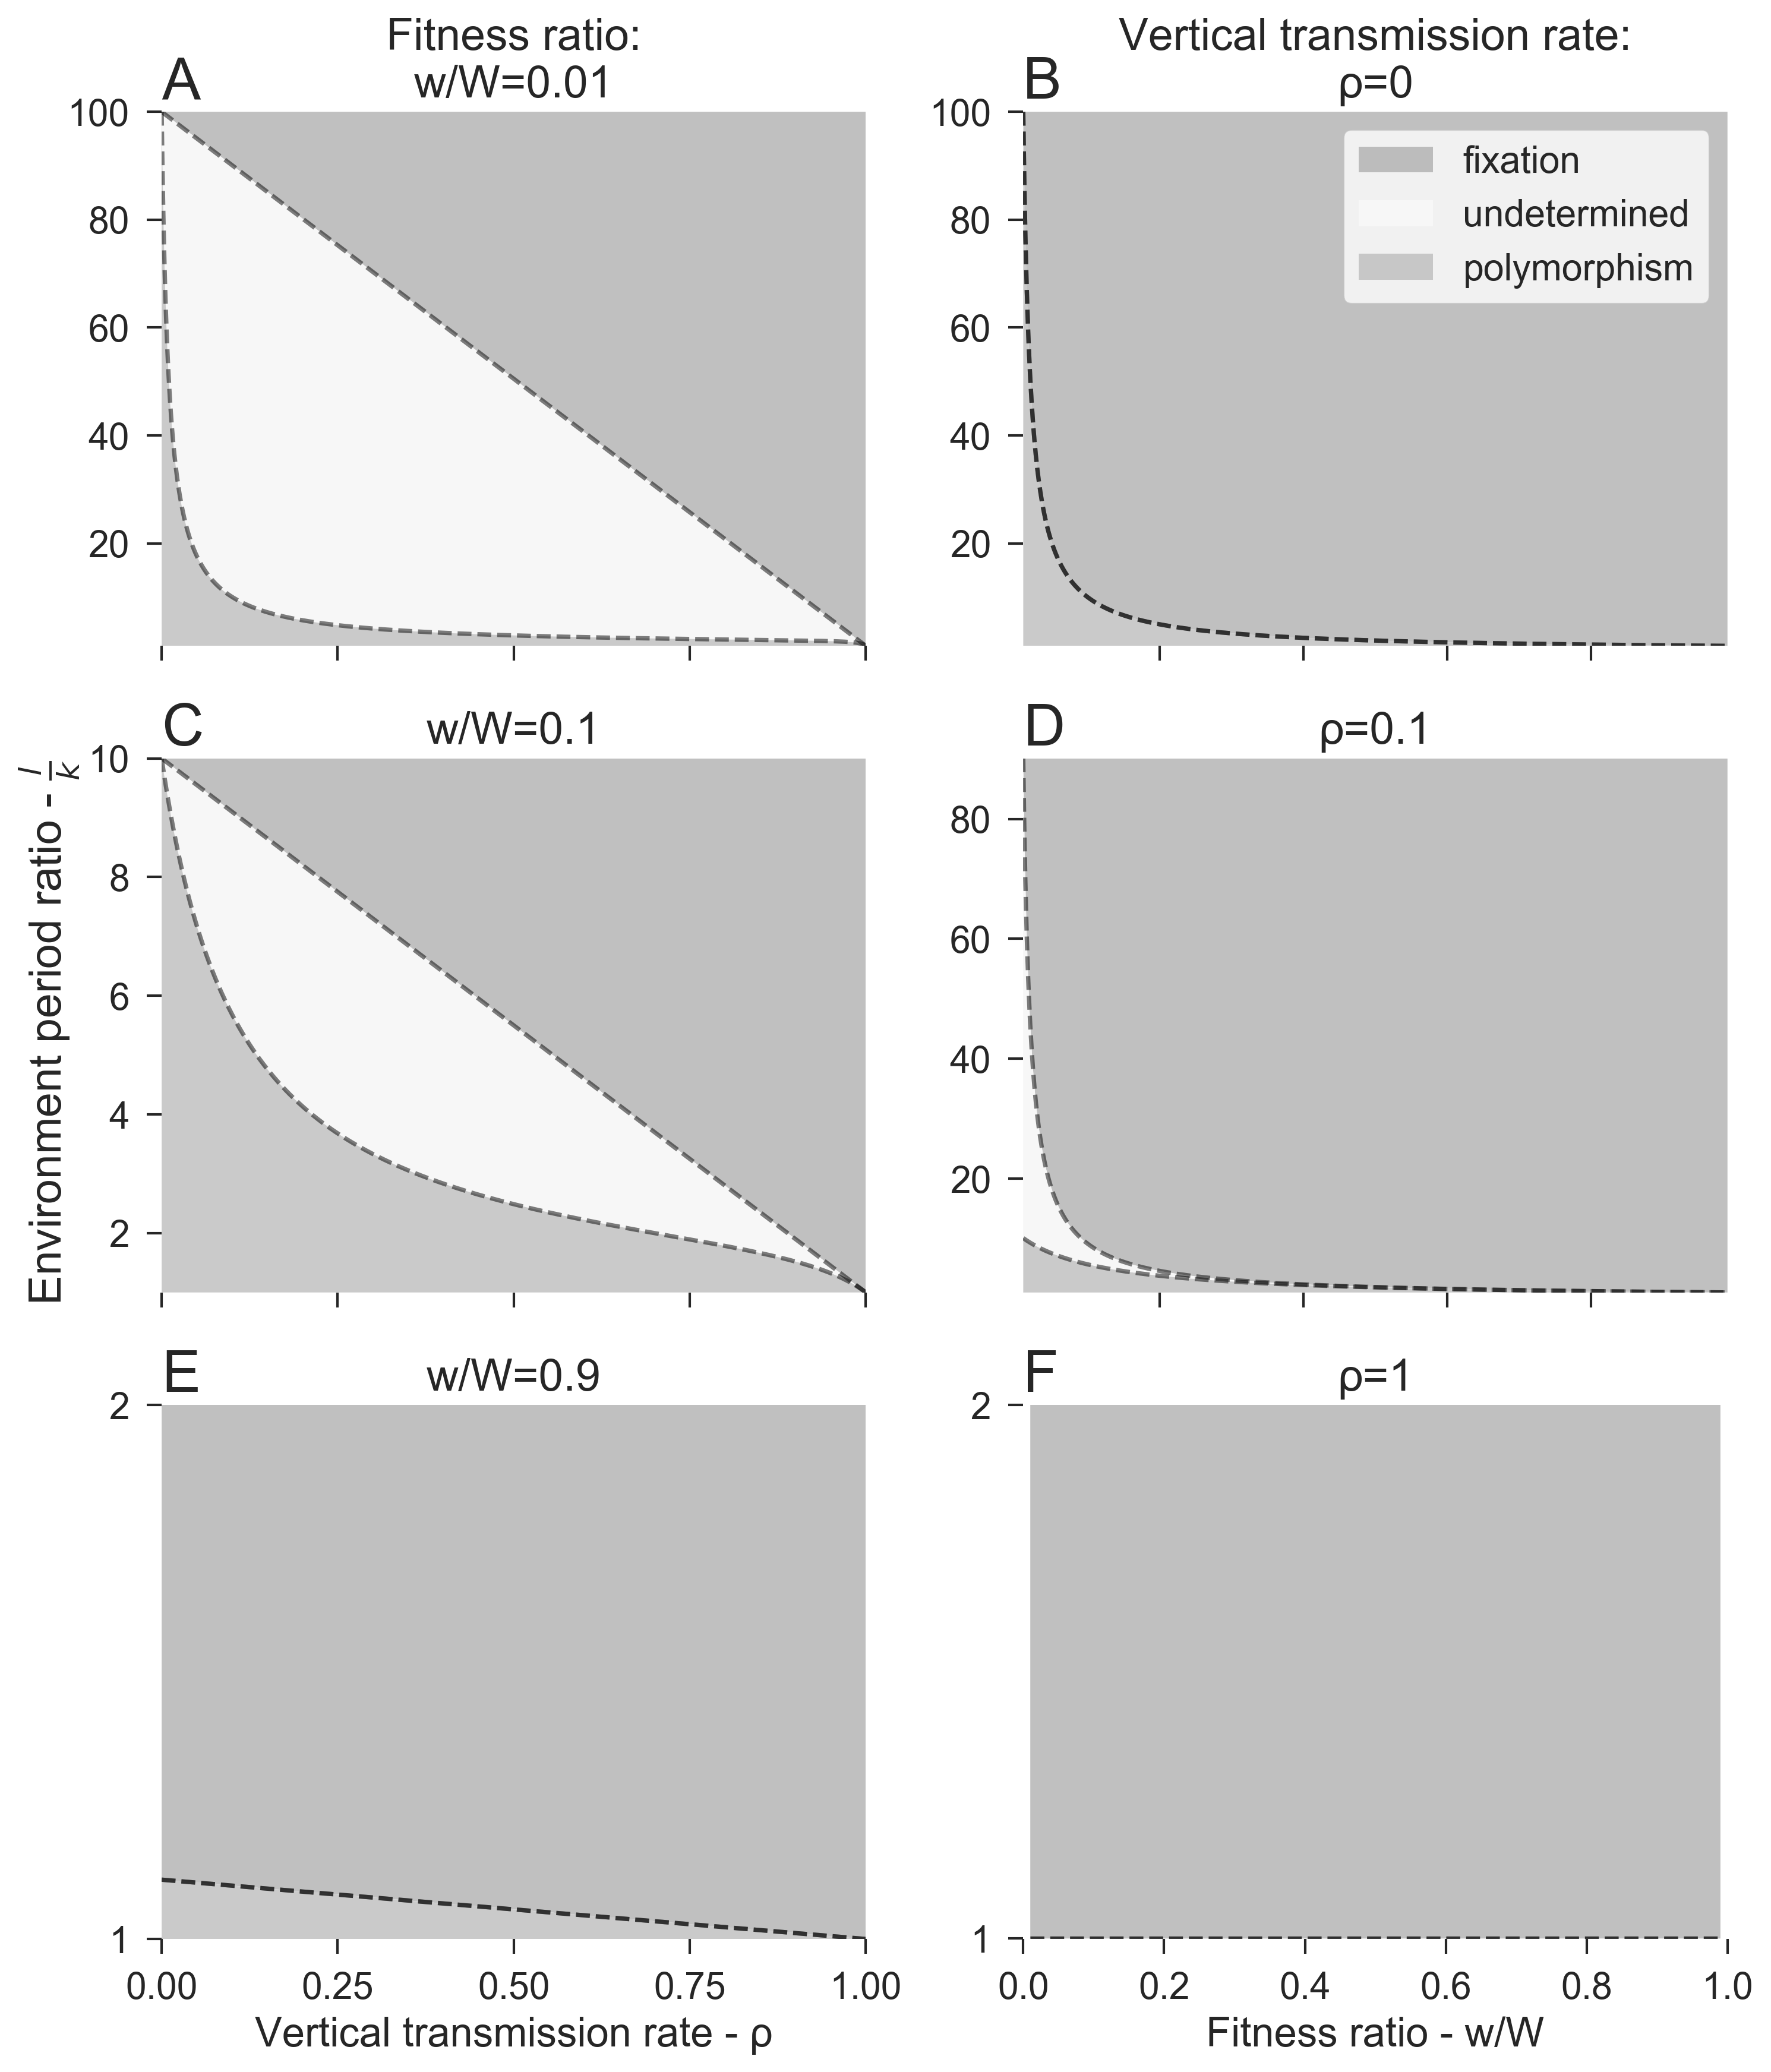

In [67]:
im = PIL.Image.open('../figures/lk_phase_plane.png')
im.convert('L')